In [1]:
import pandas as pd 
import numpy as np
from google.colab import data_table
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
def visual(inp):
  data_table.DataTable.max_columns=100
  return data_table.DataTable(inp)

In [2]:
df=pd.read_csv("/content/pre_processed_dataset.csv",low_memory=False)
df.shape

(225741, 68)

In [5]:
visual(df.describe())

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,...,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000,225741.000000
mean,112872.908909,8879.294213,0.135350,0.002007,0.001554,0.005133,0.001152,0.046108,0.018942,0.042625,...,0.413125,0.001848,0.000327,0.002081,0.001776,0.086019,0.055314,0.107320,0.064629,0.567141
std,65166.336082,19754.491905,0.262705,0.007987,0.007395,0.017755,0.007582,0.159601,0.110955,0.130566,...,0.080123,0.007979,0.005323,0.009002,0.007843,0.182110,0.195360,0.224345,0.165260,0.495473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56438.000000,80.000000,0.000593,0.000518,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,112873.000000,80.000000,0.012103,0.001036,0.001360,0.000164,0.000032,0.001712,0.000000,0.002241,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,169308.000000,80.000000,0.073377,0.002071,0.001700,0.000344,0.002243,0.002911,0.004076,0.008275,...,0.384615,0.000019,0.000000,0.000019,0.000019,0.068665,0.000000,0.068782,0.061857,1.000000
max,225744.000000,65532.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225741 entries, 0 to 225740
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    225741 non-null  int64  
 1    Destination Port             225741 non-null  int64  
 2    Flow Duration                225741 non-null  float64
 3    Total Fwd Packets            225741 non-null  float64
 4    Total Backward Packets       225741 non-null  float64
 5   Total Length of Fwd Packets   225741 non-null  float64
 6    Total Length of Bwd Packets  225741 non-null  float64
 7    Fwd Packet Length Max        225741 non-null  float64
 8    Fwd Packet Length Min        225741 non-null  float64
 9    Fwd Packet Length Mean       225741 non-null  float64
 10   Fwd Packet Length Std        225741 non-null  float64
 11  Bwd Packet Length Max         225741 non-null  float64
 12   Bwd Packet Length Min        225741 non-nul

In [3]:
# convert pandas dataframe to numpy array
data=df.to_numpy()
data.shape

(225741, 68)

In [4]:
# split data sample and features value
n_samples, n_features= data.shape

# decreament features by one because of the first feature
n_features=n_features-1

# split data to X and last feature which is 'Label' to y
X=data[:,0:n_features]
y=data[:,n_features]

print(X.shape)
print(y.shape)

(225741, 67)
(225741,)


In [5]:
# create 10 folds for cross validation
folds=StratifiedKFold(n_splits=10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [6]:
# split data to train and test parts
x_train, x_test, y_train, y_test=train_test_split(X,y,train_size=0.3)

In [7]:
# define a function to fit and predict the model then return the scores that we want and confusion matrix
def output(model, x_train,x_test,y_train,y_test,folds):
  y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
  print(f"Accuracy_score: {accuracy_score(y_pred,y_train)*100}",)
  print(f"precision_score: {precision_score(y_train, y_pred)*100}")
  print(f"recall_score: {recall_score(y_train, y_pred)*100}")
  print(f"f1_score: {f1_score(y_train, y_pred)*100}")
  matrix=confusion_matrix(y_train, y_pred)
  fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

Accuracy_score: 93.3522341336641
precision_score: 89.51440022369279
recall_score: 99.99479410692904
f1_score: 94.46479946885681


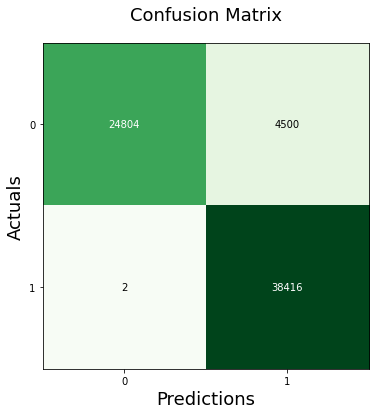

In [12]:
# logistic regression(liblinear) model
output(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 99.99114024984496
precision_score: 100.0
recall_score: 99.98438232078713
f1_score: 99.99219055056618


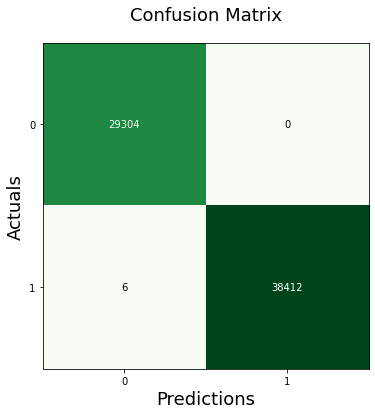

In [13]:
# random forest model with 15 estimators
output(RandomForestClassifier(n_estimators=15),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 99.98671037476743
precision_score: 99.99739657910494
recall_score: 99.97917642771618
f1_score: 99.98828567337854


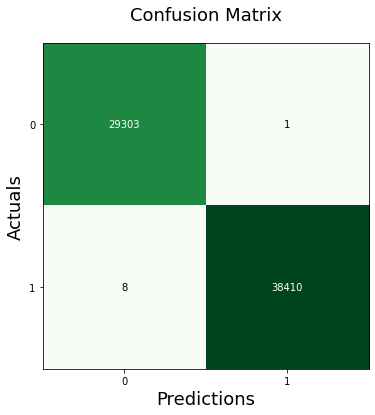

In [14]:
# random forest model with 30 estimators
output(RandomForestClassifier(n_estimators=30),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 99.98671037476743
precision_score: 99.99739657910494
recall_score: 99.97917642771618
f1_score: 99.98828567337854


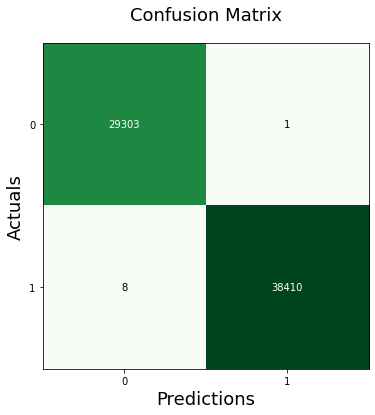

In [15]:
# random forest model with 60 estimators
output(RandomForestClassifier(n_estimators=60),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 99.9822804996899
precision_score: 99.97921214011018
recall_score: 99.98960498960498
f1_score: 99.98440829478717


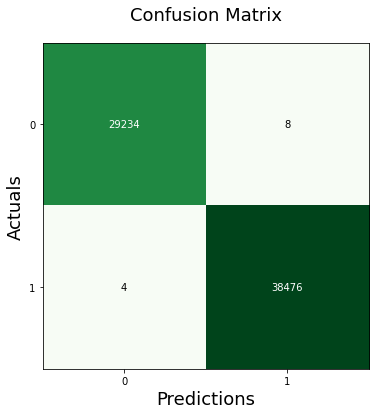

In [8]:
# decision tree model
output(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 77.12264847464635
precision_score: 71.29569583665301
recall_score: 99.99740124740126
f1_score: 83.24193356480731


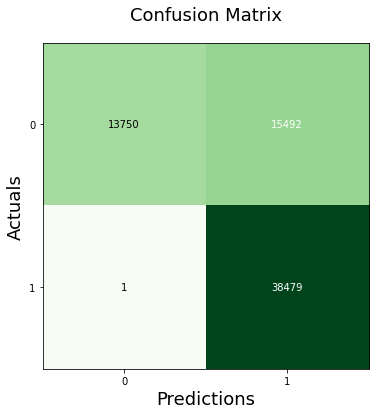

In [9]:
# gaussian naive bayes model
output(GaussianNB(),x_train,x_test,y_train,y_test,folds)

Accuracy_score: 99.97785062461239
precision_score: 99.96362975086379
recall_score: 99.99740124740126
f1_score: 99.98051264729192


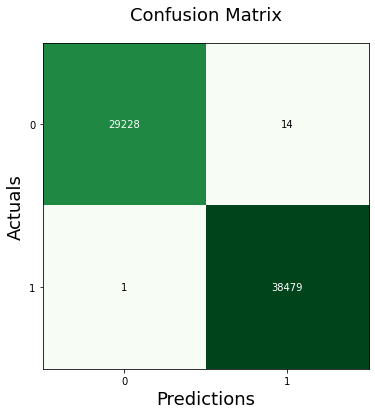

In [10]:
# KNN model with 1 neighbor
output(KNeighborsClassifier(n_neighbors = 1),x_train,x_test,y_train,y_test,folds)